# Linear Regression

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the dataset

In [4]:
data=pd.read_csv('C:/Users/ajitr/Downloads/Multiple-Linear-Regression-master/50_Startups.csv')

In [5]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Describing the Data

In [6]:
data.shape

(50, 5)

In [7]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


In [10]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [11]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [12]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [13]:
x=data.iloc[:,0:3].values
y=data.iloc[:,-1].values.reshape(-1,1)

In [14]:
x

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [15]:
y

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6 ],
       [152211.77],
       [149759.96],
       [146121.95],
       [144259.4 ],
       [141585.52],
       [134307.35],
       [132602.65],
       [129917.04],
       [126992.93],
       [125370.37],
       [124266.9 ],
       [122776.86],
       [118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [ 99937.59],
       [ 97483.56],
       [ 97427.84],
       [ 96778.92],
       [ 96712.8 ],
       [ 96479.51],
       [ 90708.19],
       [ 89949.14],
       [ 81229.06],
       [ 81005.76],
       [ 78239.91],
       [ 77798.83],
       [ 71498.49],
       [ 69758.98],
       [ 65200.33],
       [ 64926.08],
       [ 49490.75],
       [ 42559.73],
       [ 35673.41],
       [ 14681.4 ]])

# Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [18]:
x_train.shape

(40, 3)

In [38]:
x_test

array([[ 66051.52, 182645.56, 118148.2 ],
       [100671.96,  91790.61, 249744.55],
       [101913.08, 110594.11, 229160.95],
       [ 27892.92,  84710.77, 164470.71],
       [153441.51, 101145.55, 407934.54],
       [ 72107.6 , 127864.55, 353183.81],
       [ 20229.59,  65947.93, 185265.1 ],
       [ 61136.38, 152701.92,  88218.23],
       [ 73994.56, 122782.75, 303319.26],
       [142107.34,  91391.77, 366168.42]])

In [20]:
x_test.shape

(10, 3)

In [21]:
y_train.shape

(40, 1)

In [22]:
y_test.shape

(10, 1)

In [23]:
y_test

array([[103282.38],
       [144259.4 ],
       [146121.95],
       [ 77798.83],
       [191050.39],
       [105008.31],
       [ 81229.06],
       [ 97483.56],
       [110352.25],
       [166187.94]])

# Fitting Multiple Linear Regression to the Training set

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
prd=LinearRegression()

In [26]:
prd.fit(x_train,y_train)

LinearRegression()

# Predicting the Test set results

In [27]:
predict=prd.predict(x_test)

In [28]:
predict

array([[103901.8969696 ],
       [132763.05993126],
       [133567.90370044],
       [ 72911.78976736],
       [179627.92567224],
       [115166.64864795],
       [ 67113.5769057 ],
       [ 98154.80686776],
       [114756.11555221],
       [169064.01408795]])

In [29]:
check = pd.DataFrame(y_test,columns=['Actual profit'])

In [30]:
check['predicted profit']=predict

In [31]:
check

,Actual profit,predicted profit
0,103282.38,103901.896970
1,144259.40,132763.059931
2,146121.95,133567.903700
3,77798.83,72911.789767
4,191050.39,179627.925672
5,105008.31,115166.648648
6,81229.06,67113.576906
7,97483.56,98154.806868
8,110352.25,114756.115552
9,166187.94,169064.014088


In [32]:
a=np.array([80000,100000,120000,140000,160000,180000,200000])
r=np.array([80000,100000,120000,140000,160000,180000,200000])

# Visualizing the Data

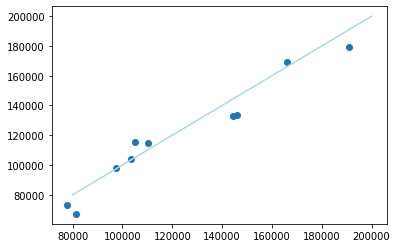

In [33]:
plt.scatter(y_test,predict)
plt.plot(a,r,color='lightblue')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [35]:
mean_squared_error(y_test,predict)

77506468.16885401

In [36]:
mean_absolute_error(y_test,predict)

7320.441614848128

In [37]:
r2_score(y_test,predict)

0.9393955917820571